In [1]:
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
import matplotlib.pyplot as plt

In [2]:
change_df = pd.read_csv('../datasets/group_people.csv')
bots_df = pd.read_csv('../datasets/bots.csv')
users_df = pd.read_csv('../datasets/users.csv')
data = pd.concat([bots_df, users_df, change_df])
data = data.fillna(0)

source_features = ['has_photo','has_mobile','is_friend','can_post','can_see_all_posts',
            'can_see_audio','can_write_private_message','can_send_friend_request',
            'can_be_invited_group','followers_count','blacklisted','blacklisted_by_me',
            'is_favorite','is_hidden_from_feed','common_count','university','faculty',
            'graduation','relation','verified','deactivated','friend_status','can_access_closed',
            'is_closed', 'city_id','country_id','last_seen_platform','last_seen_time',
            'interests_bool', 'books_bool', 'tv_bool', 'quotes_bool', 'about_bool',
            'games_bool', 'movies_bool', 'activities_bool', 'music_bool', 'mobile_phone_bool',
            'home_phone_bool', 'site_bool', 'status_bool', 'university_bool',
            'university_name_bool', 'faculty_bool', 'faculty_name_bool', 'graduation_bool',
            'home_town_bool', 'relation_bool', 'personal_bool', 'universities_bool',
            'schools_bool', 'occupation_bool', 'education_form_bool', 'education_status_bool',
            'relation_partner_bool', 'skype_bool', 'twitter_bool', 'livejournal_bool',
            'instagram_bool', 'facebook_bool', 'facebook_name_bool', 'relatives_in_friends_bool',
            'change_nickname_bool', 'partner_in_friends_bool', 'partner_in_friends_bool',
            'posts_count', 'users_subscriptions_count', 'groups_subscriptions_count',
            'albums_count', 'audios_count', 'gifts_count', 'pages_count', 'photos_count',
            'subscriptions_count', 'videos_count', 'video_playlists_count', 'subscriptions_followers_coef',
            'subscriptions_followers_coef_norm']

In [14]:
class Result:
    def __init__(self, selected_features_len, clf, accuracy, precision, recall, auc, f1, fpr, tpr):
        self.selected_features_len = selected_features_len
        self.clf = clf
        self.accuracy = accuracy
        self.precision = precision
        self.recall = recall
        self.auc = auc
        self.f1 = f1
        self.fpr = fpr
        self.tpr = tpr
    
    @property
    def metrics_sum(self):
        return self.accuracy + self.precision + self.recall + self.auc + self.f1

# Feature selection

In [15]:
X, y = data[source_features], data[["bots"]].values.flatten()

clfs = [
    DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10),
    RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20),
    LogisticRegression(random_state=0),
    svm.SVC(probability=True),
    MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter=1000),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0),
    HistGradientBoostingClassifier(),
]
results = []
features_numbers = list(range(10, 50, 5))
for features_number in features_numbers:
    for clf in clfs:
        # Разделение данных на train и test
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y)

        # Обучаем PCA для выделения features_number признаков
        pca = PCA(n_components=features_number)
        pca.fit(Xtrain)

        # Изменяем наши наборы данных под выбранные признаки
        Xtrain = pca.transform(Xtrain)
        Xtest = pca.transform(Xtest)
        

        # Обучаем классификатор
        clf.fit(Xtrain, Ytrain)
        
        # Предсказываем y
        y_pred_test = clf.predict(Xtest)
        
        # Вычисляем метрики
        test_accuracy = accuracy_score(y_pred_test, Ytest)
        test_precision = precision_score(y_pred_test, Ytest)
        test_recall = recall_score(y_pred_test, Ytest)
        test_f1 = f1_score(y_pred_test, Ytest)
        
        y_true = Ytest
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_test)
        test_auc = auc(fpr, tpr)
        
        
        result = Result(features_number, clf, test_accuracy, test_precision, test_recall, test_auc, test_f1, fpr, tpr)
        results.append(result)
        print(clf)
        print(f"F1 score: {f1_score(y_pred_test, Ytest)}")
        print(f"Recall score: {recall_score(y_pred_test, Ytest)}")
        print(f"Precision score: {precision_score(y_pred_test, Ytest)}")
        print(f"Accuracy score: {accuracy_score(y_pred_test, Ytest)}")
        print(f"Auc score: {test_auc}")
        print()

features_number 10
DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50,
                       min_samples_split=10)
F1 score: 0.7803223070398643
Recall score: 0.8662900188323918
Precision score: 0.7098765432098766
Accuracy score: 0.8846838824577026
Auc score: 0.8327230025185803

RandomForestClassifier(criterion='entropy', min_samples_leaf=100,
                       min_samples_split=20)
F1 score: 0.7638640429338104
Recall score: 0.9343544857768052
Precision score: 0.6459909228441755
Accuracy score: 0.8824577025823687
Auc score: 0.8135317390246114

LogisticRegression(random_state=0)
F1 score: 0.6022155085599195
Recall score: 0.8236914600550964
Precision score: 0.4746031746031746
Accuracy score: 0.8241317898486198
Auc score: 0.7174996071035675

SVC(probability=True)
F1 score: 0.5612244897959184
Recall score: 0.9105960264900662
Precision score: 0.4056047197640118
Accuracy score: 0.8085485307212823
Auc score: 0.694192666004455



/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
F1 score: 0.4574175824175824
Recall score: 0.2965271593944791
Precision score: 1.0
Accuracy score: 0.2965271593944791
Auc score: 0.5

GaussianNB()
F1 score: 0.5561904761904762
Recall score: 0.8111111111111111
Precision score: 0.42318840579710143
Accuracy score: 0.792520035618878
Auc score: 0.6897433031556202

AdaBoostClassifier(n_estimators=100, random_state=0)
F1 score: 0.808688387635756
Recall score: 0.8897058823529411
Precision score: 0.7411944869831547
Accuracy score: 0.8980409617097062
Auc score: 0.8517648517778298

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
F1 score: 0.8131147540983606
Recall score: 0.8888888888888888
Precision score: 0.7492447129909365
Accuracy score: 0.8984861976847729
Auc score: 0.8550516494247612

HistGradientBoostingClassifier()
F1 score: 0.8349514563106796
Recall score: 0.9214285714285714
Precision score: 0.76331

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)
F1 score: 0.5896414342629482
Recall score: 0.8385269121813032
Precision score: 0.45468509984639016
Accuracy score: 0.8165627782724845
Auc score: 0.7094742113652013

SVC(probability=True)
F1 score: 0.5745745745745746
Recall score: 0.9198717948717948
Precision score: 0.4177583697234352
Accuracy score: 0.8107747105966162
Auc score: 0.7008612246308004



/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
F1 score: 0.3086269744835966
Recall score: 0.21096345514950166
Precision score: 0.5746606334841629
Accuracy score: 0.23998219056099732
Auc score: 0.3372355599511781

GaussianNB()
F1 score: 0.567251461988304
Recall score: 0.8314285714285714
Precision score: 0.43047337278106507
Accuracy score: 0.8023152270703473
Auc score: 0.6964468774733351

AdaBoostClassifier(n_estimators=100, random_state=0)
F1 score: 0.8279301745635911
Recall score: 0.9239332096474954
Precision score: 0.75
Accuracy score: 0.9078361531611754
Auc score: 0.8620417193426043

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
F1 score: 0.7968253968253968
Recall score: 0.9094202898550725
Precision score: 0.7090395480225988
Accuracy score: 0.8860195903829029
Auc score: 0.8382648975483605

HistGradientBoostingClassifier()
F1 score: 0.8605769230769231
Recall score: 0.9306759098786829
Preci

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
F1 score: 0.4632227163872733
Recall score: 0.3014247551202137
Precision score: 1.0
Accuracy score: 0.3014247551202137
Auc score: 0.5

GaussianNB()
F1 score: 0.5895372233400401
Recall score: 0.8161559888579387
Precision score: 0.46141732283464565
Accuracy score: 0.8183437221727515
Auc score: 0.7102244900951626

AdaBoostClassifier(n_estimators=100, random_state=0)
F1 score: 0.8573825503355703
Recall score: 0.904424778761062
Precision score: 0.8149920255183413
Accuracy score: 0.9243098842386465
Auc score: 0.8908190516720799

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
F1 score: 0.8329092451229857
Recall score: 0.9229323308270677
Precision score: 0.758887171561051
Accuracy score: 0.9122885129118433
Auc score: 0.8666230729600127

HistGradientBoostingClassifier()
F1 score: 0.855704697986577
Recall score: 0.9205776173285198
Precision score: 0.799373

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
F1 score: 0.0
Recall score: 0.0
Precision score: 0.0
Accuracy score: 0.711487088156723
Auc score: 0.5

GaussianNB()
F1 score: 0.5747368421052632
Recall score: 0.8584905660377359
Precision score: 0.4319620253164557
Accuracy score: 0.8201246660730187
Auc score: 0.7020404922121312

AdaBoostClassifier(n_estimators=100, random_state=0)
F1 score: 0.8269381362568521
Recall score: 0.8934010152284264
Precision score: 0.7696793002915452
Accuracy score: 0.9016028495102404
Auc score: 0.864647342453465

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
F1 score: 0.8276999175597691
Recall score: 0.899641577060932
Precision score: 0.766412213740458
Accuracy score: 0.9069456812110418
Auc score: 0.8656071125270487

HistGradientBoostingClassifier()
F1 score: 0.8680161943319837
Recall score: 0.9305555555555556
Precision score: 0.8133535660091047
Accuracy score: 0.927

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
F1 score: 0.49616858237547895
Recall score: 0.6301703163017032
Precision score: 0.40916271721958924
Accuracy score: 0.7658058771148709
Auc score: 0.6574641856401728

GaussianNB()
F1 score: 0.5752855659397716
Recall score: 0.8710691823899371
Precision score: 0.4294573643410853
Accuracy score: 0.8178984861976848
Auc score: 0.701924184981286

AdaBoostClassifier(n_estimators=100, random_state=0)
F1 score: 0.8519108280254778
Recall score: 0.8799342105263158
Precision score: 0.8256172839506173
Accuracy score: 0.9171861086375779
Auc score: 0.8899675906611659

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
F1 score: 0.8599545798637396
Recall score: 0.8819875776397516
Precision score: 0.8389955686853766
Accuracy score: 0.9176313446126447
Auc score: 0.8952785364140714

HistGradientBoostingClassifier()
F1 score: 0.878714859437751
Recall score: 0.9208754208

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
F1 score: 0.4747028862478778
Recall score: 0.311219946571683
Precision score: 1.0
Accuracy score: 0.311219946571683
Auc score: 0.5

GaussianNB()
F1 score: 0.5616580310880829
Recall score: 0.8212121212121212
Precision score: 0.4267716535433071
Accuracy score: 0.8116651825467498
Auc score: 0.6950742190745709

AdaBoostClassifier(n_estimators=100, random_state=0)
F1 score: 0.8851711026615969
Recall score: 0.909375
Precision score: 0.8622222222222222
Accuracy score: 0.9327693677649154
Auc score: 0.9126515312256878

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
F1 score: 0.8409448818897637
Recall score: 0.8711256117455138
Precision score: 0.8127853881278538
Accuracy score: 0.9100623330365093
Auc score: 0.881534292553543

HistGradientBoostingClassifier()
F1 score: 0.8798076923076924
Recall score: 0.9352640545144804
Precision score: 0.8305597579425114


/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
F1 score: 0.4492052522460263
Recall score: 0.2896613190730838
Precision score: 1.0
Accuracy score: 0.2902938557435441
Auc score: 0.5006265664160401

GaussianNB()
F1 score: 0.563323201621074
Recall score: 0.8323353293413174
Precision score: 0.42572741194486985
Accuracy score: 0.8081032947462155
Auc score: 0.6952868070396038

AdaBoostClassifier(n_estimators=100, random_state=0)
F1 score: 0.8716707021791767
Recall score: 0.9015025041736227
Precision score: 0.84375
Accuracy score: 0.9292074799643811
Auc score: 0.9035063823163139

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
F1 score: 0.8663522012578617
Recall score: 0.9122516556291391
Precision score: 0.8248502994011976
Accuracy score: 0.9243098842386465
Auc score: 0.8956317403216382

HistGradientBoostingClassifier()
F1 score: 0.8835725677830941
Recall score: 0.920265780730897
Precision score: 0.8

/Users/antonkondrahin/Library/Caches/pypoetry/virtualenvs/vk-users-cVe5n_Bl-py3.9/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), max_iter=1000,
              random_state=1, solver='lbfgs')
F1 score: 0.48138056312443234
Recall score: 0.6191588785046729
Precision score: 0.3937592867756315
Accuracy score: 0.7457702582368655
Auc score: 0.6450678188487184

GaussianNB()
F1 score: 0.5774378585086042
Recall score: 0.8653295128939829
Precision score: 0.4332855093256815
Accuracy score: 0.8032056990204809
Auc score: 0.701471676547928

AdaBoostClassifier(n_estimators=100, random_state=0)
F1 score: 0.8644194756554308
Recall score: 0.8959627329192547
Precision score: 0.8350217076700435
Accuracy score: 0.9194122885129118
Auc score: 0.8959674454748932

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)
F1 score: 0.8510301109350237
Recall score: 0.8920265780730897
Precision score: 0.8136363636363636
Accuracy score: 0.9162956366874443
Auc score: 0.8863263785394931

HistGradientBoostingClassifier()
F1 score: 0.8870431893687708
Recall score: 0.9401408450

# Plot graphs of metrics

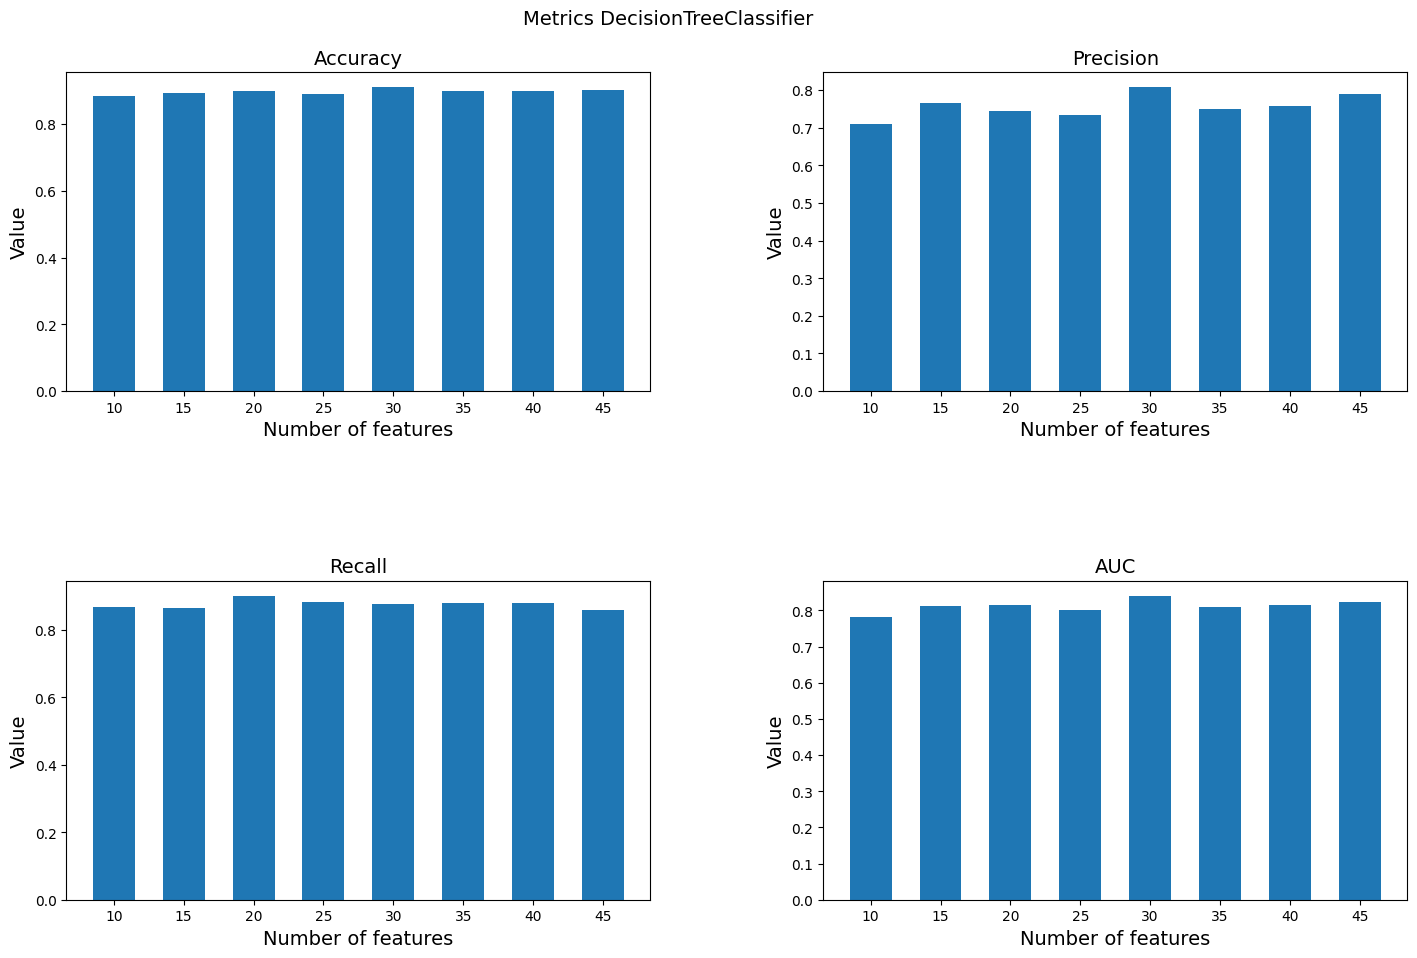

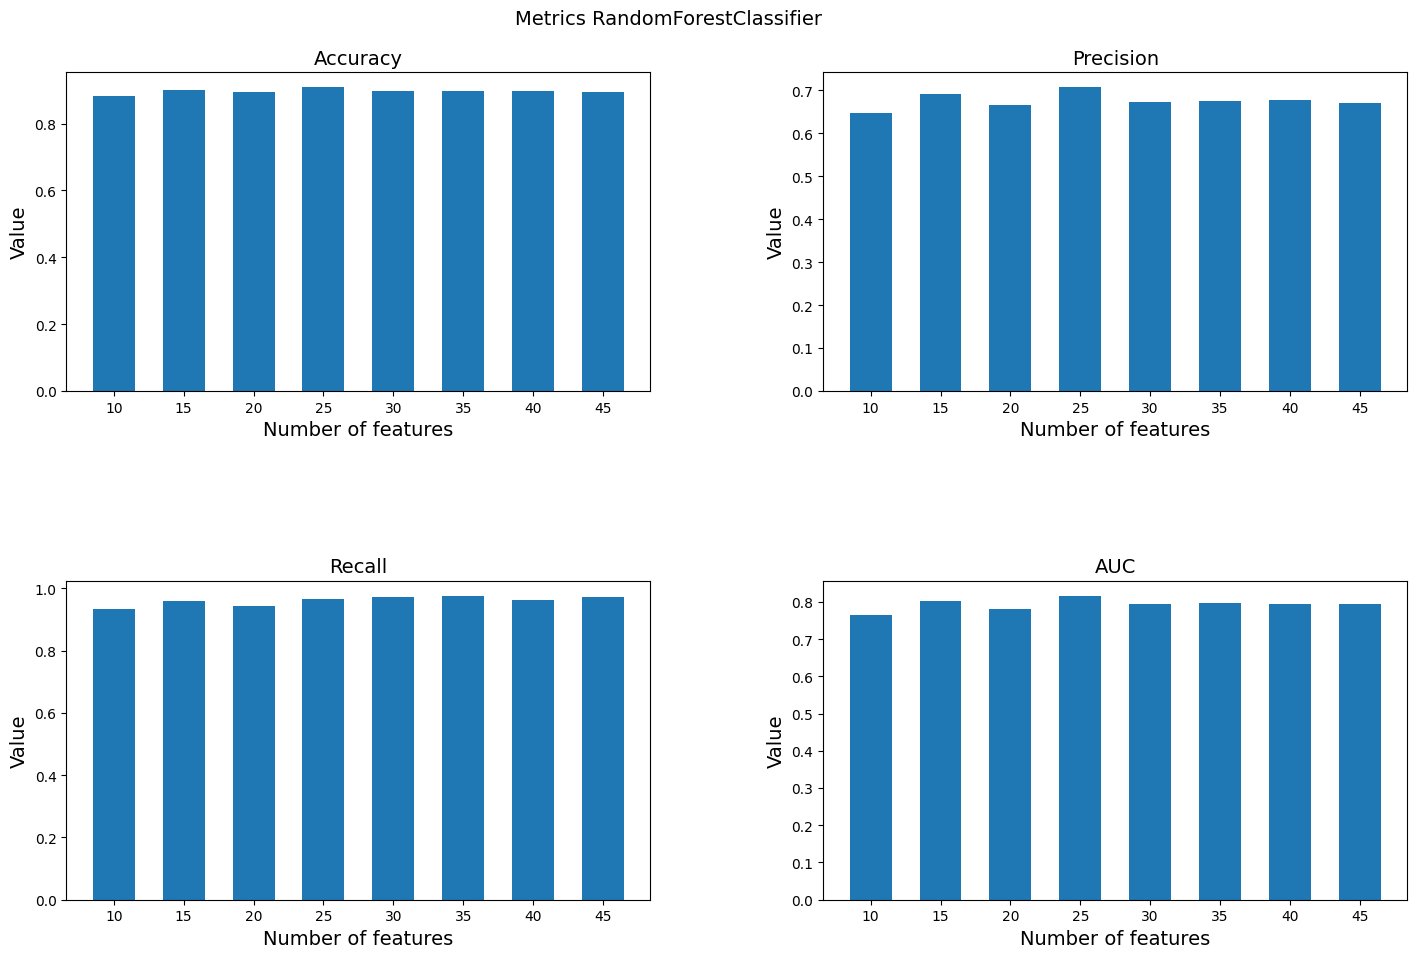

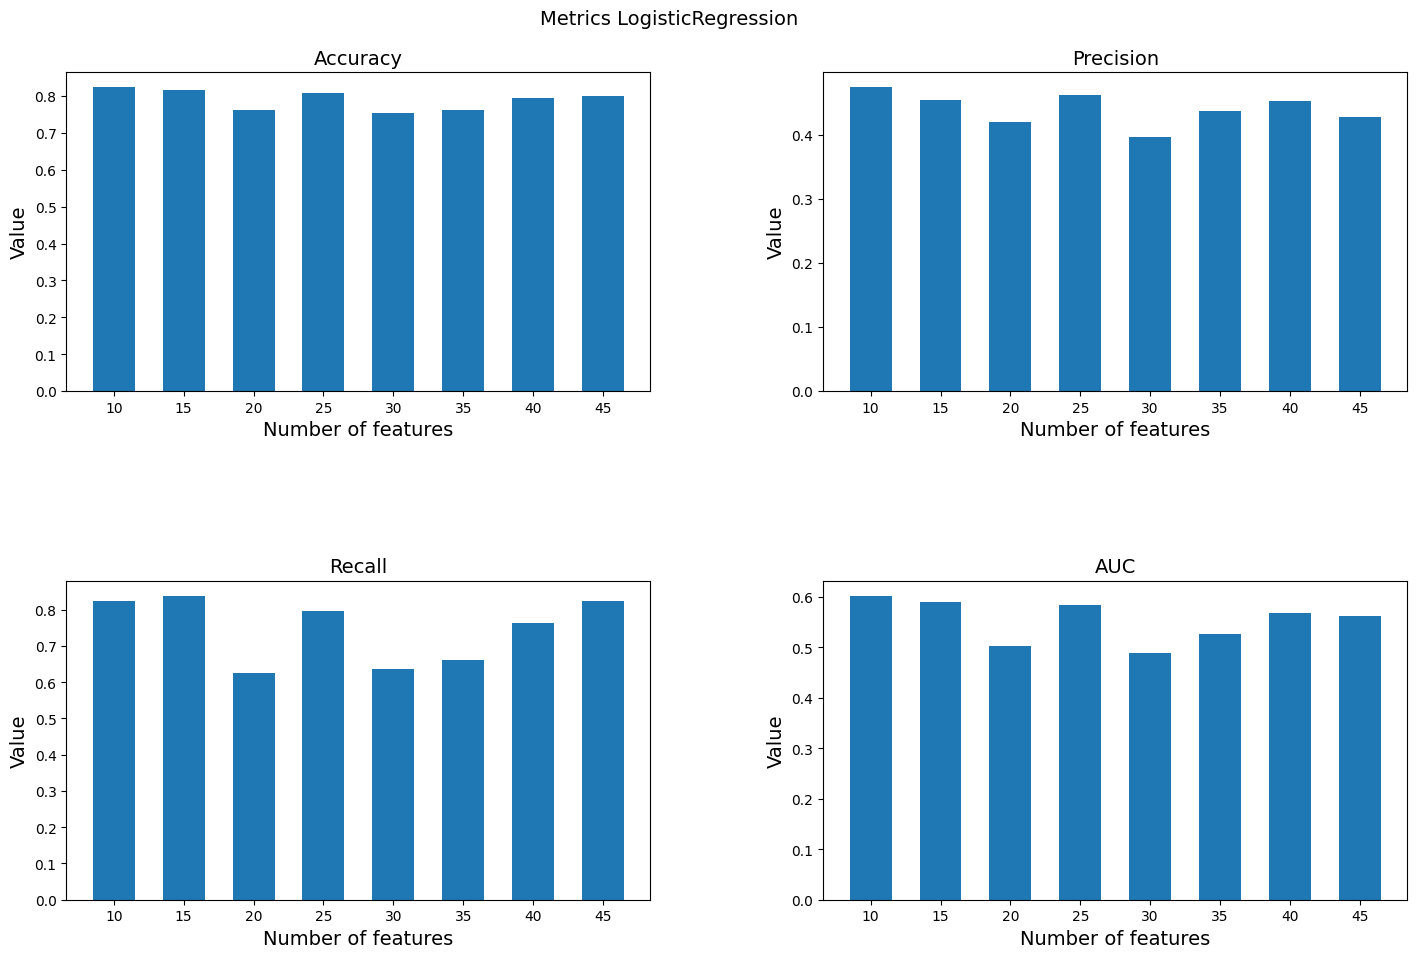

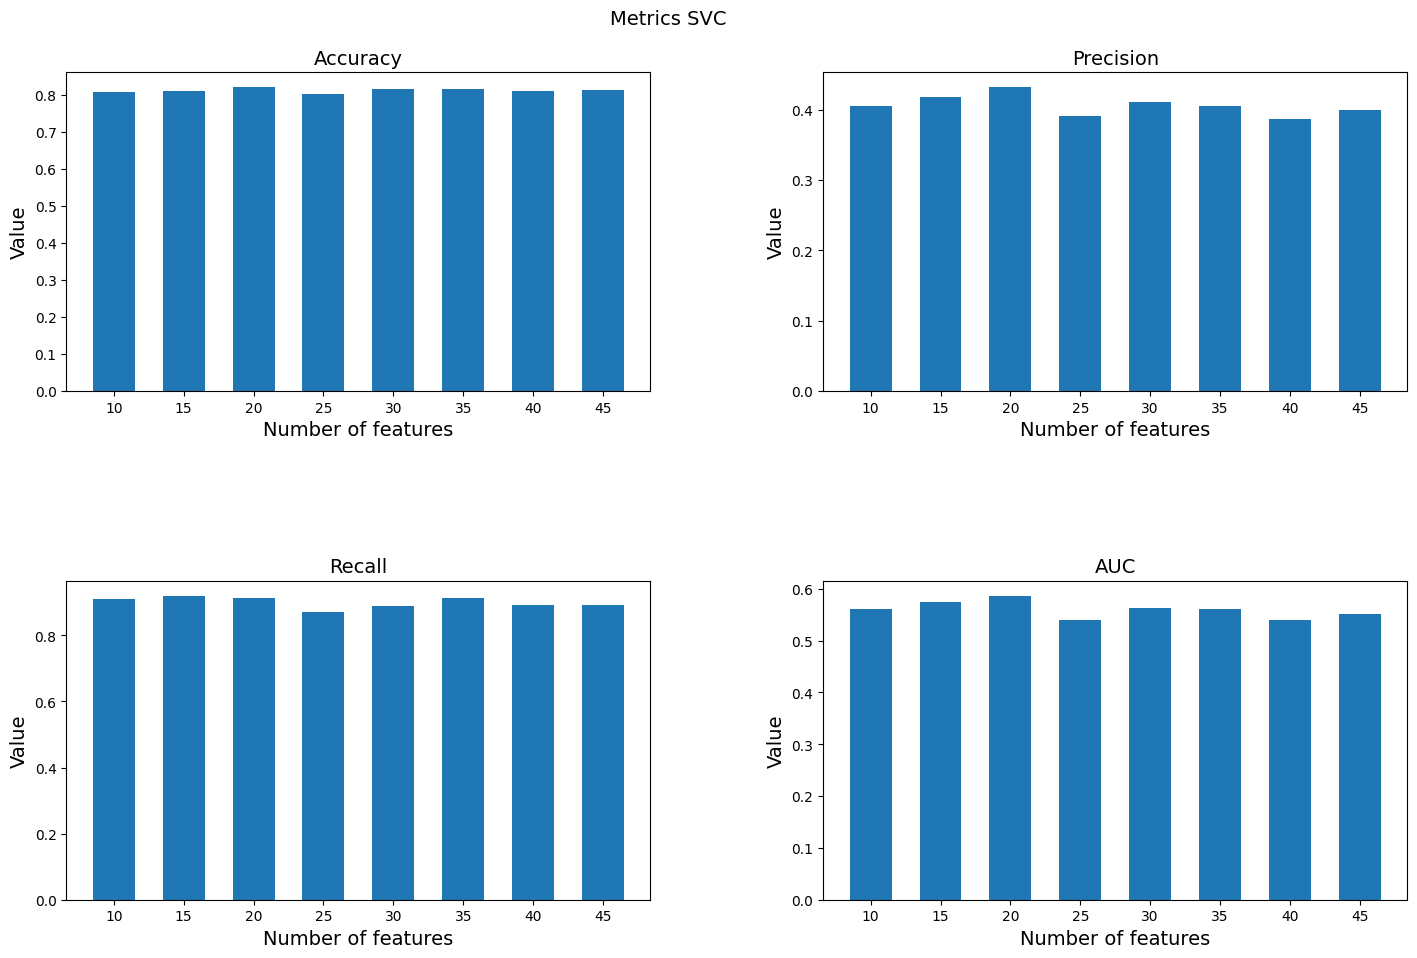

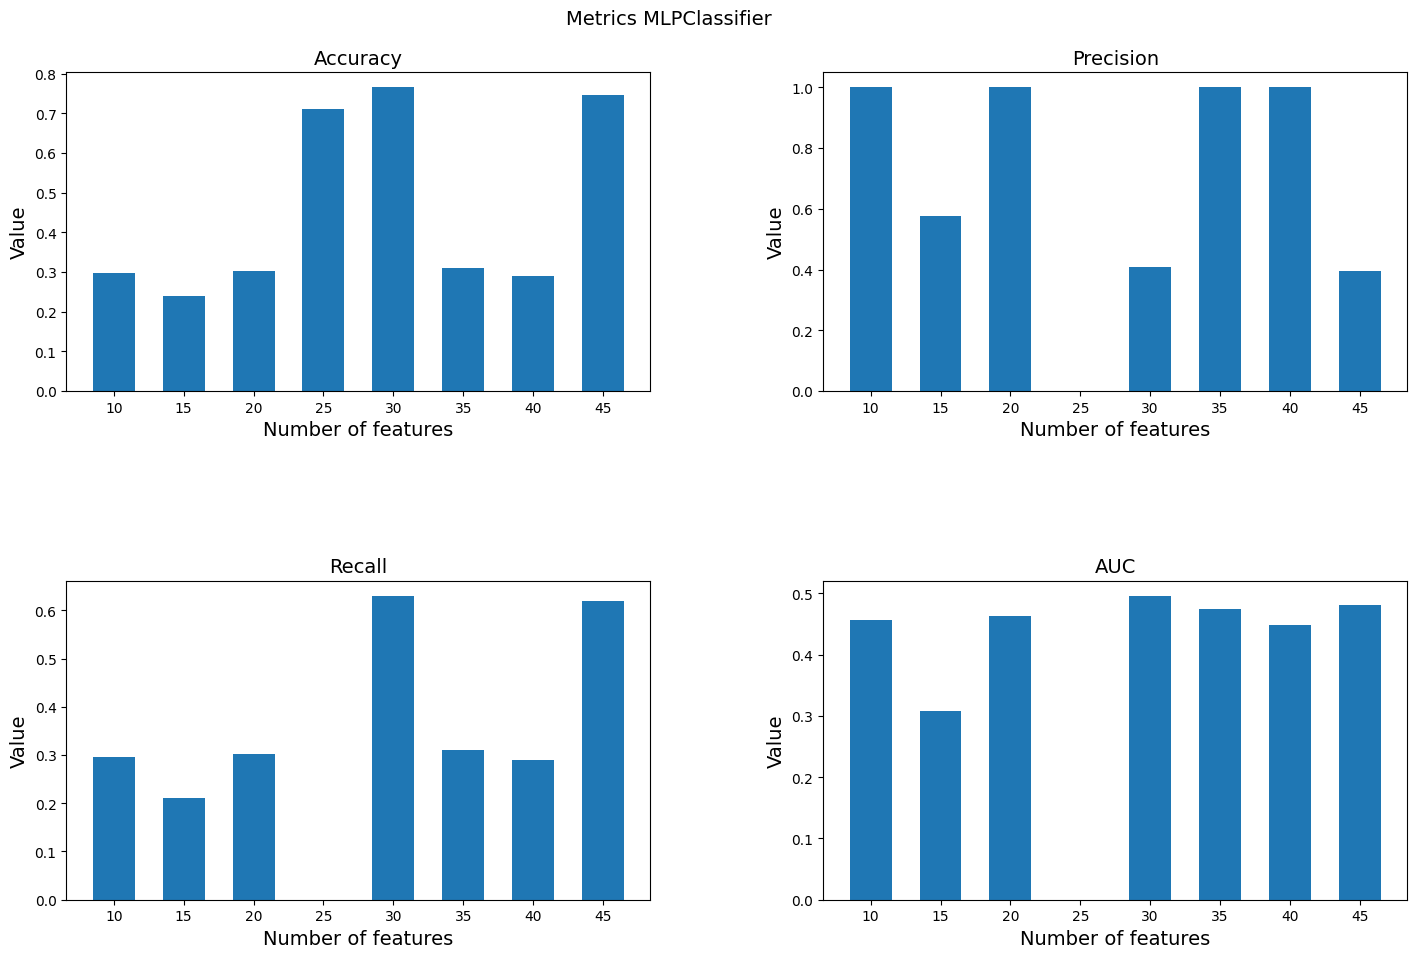

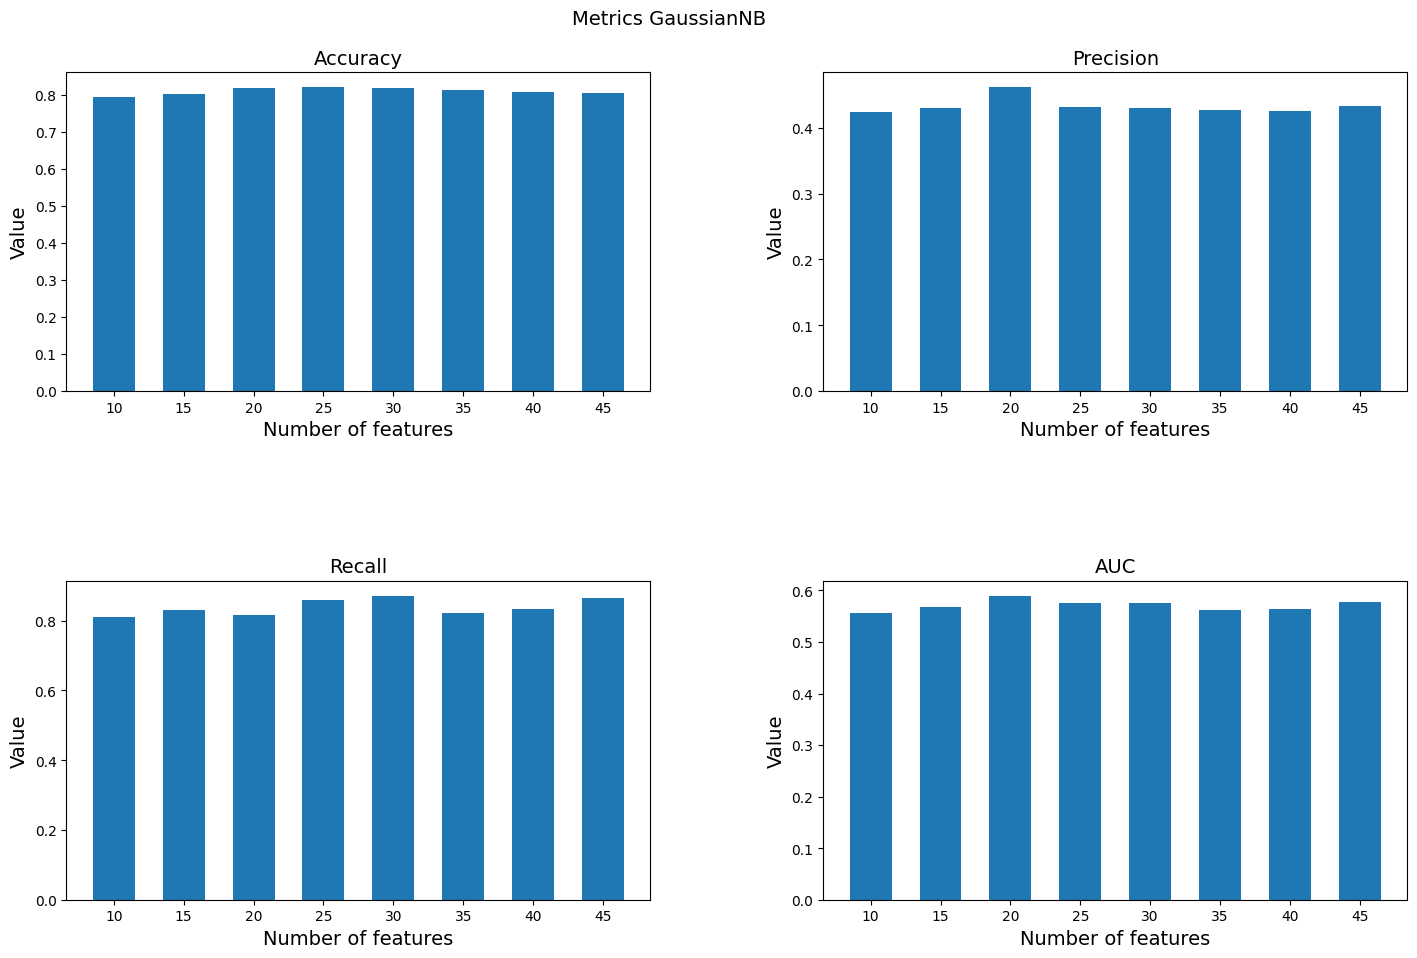

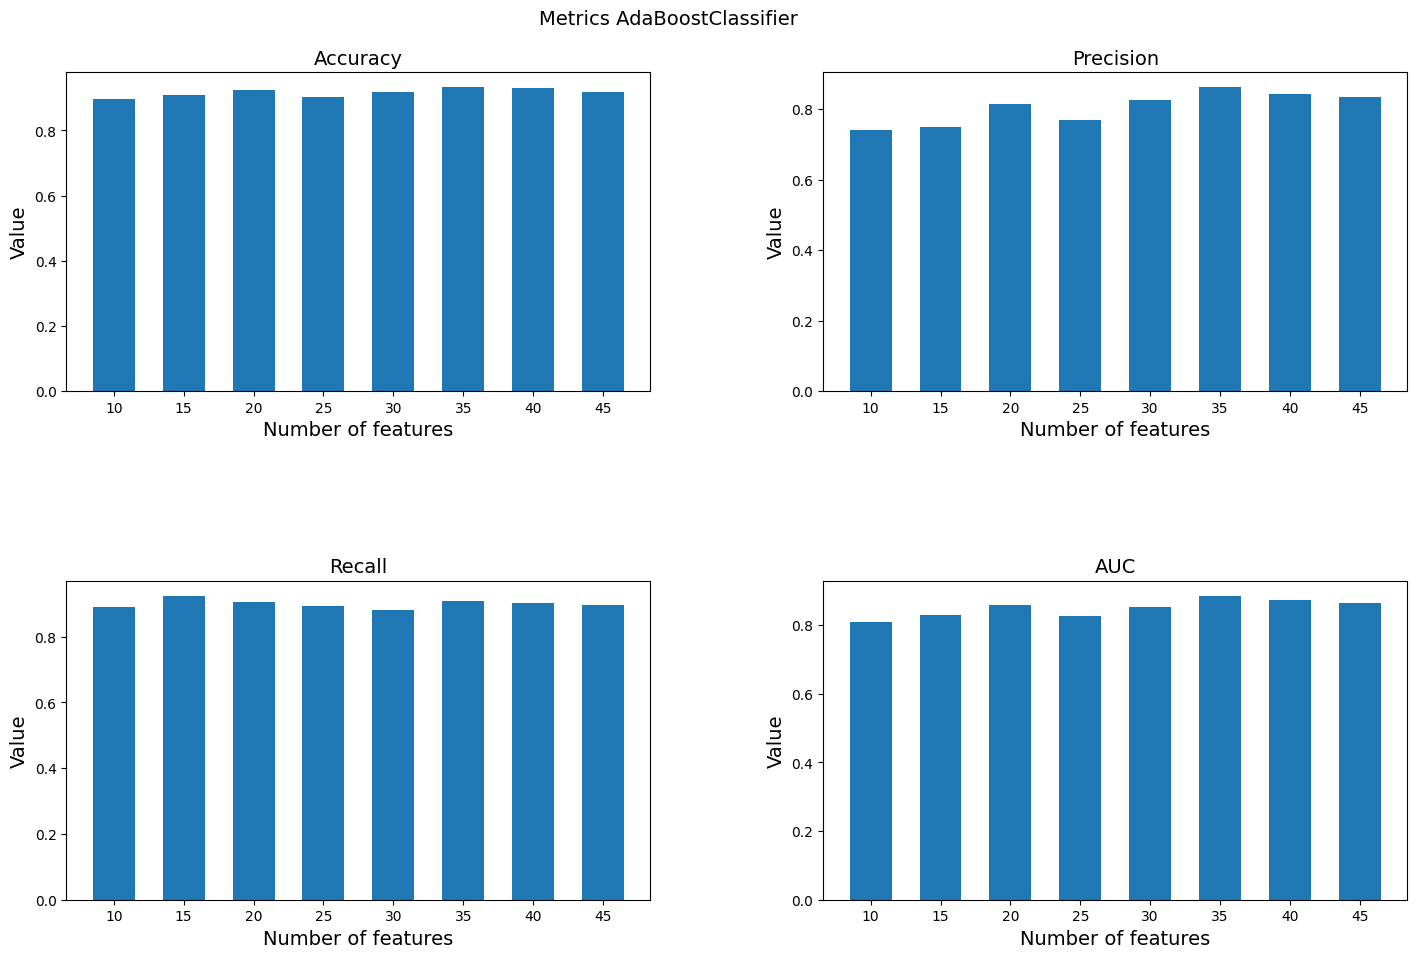

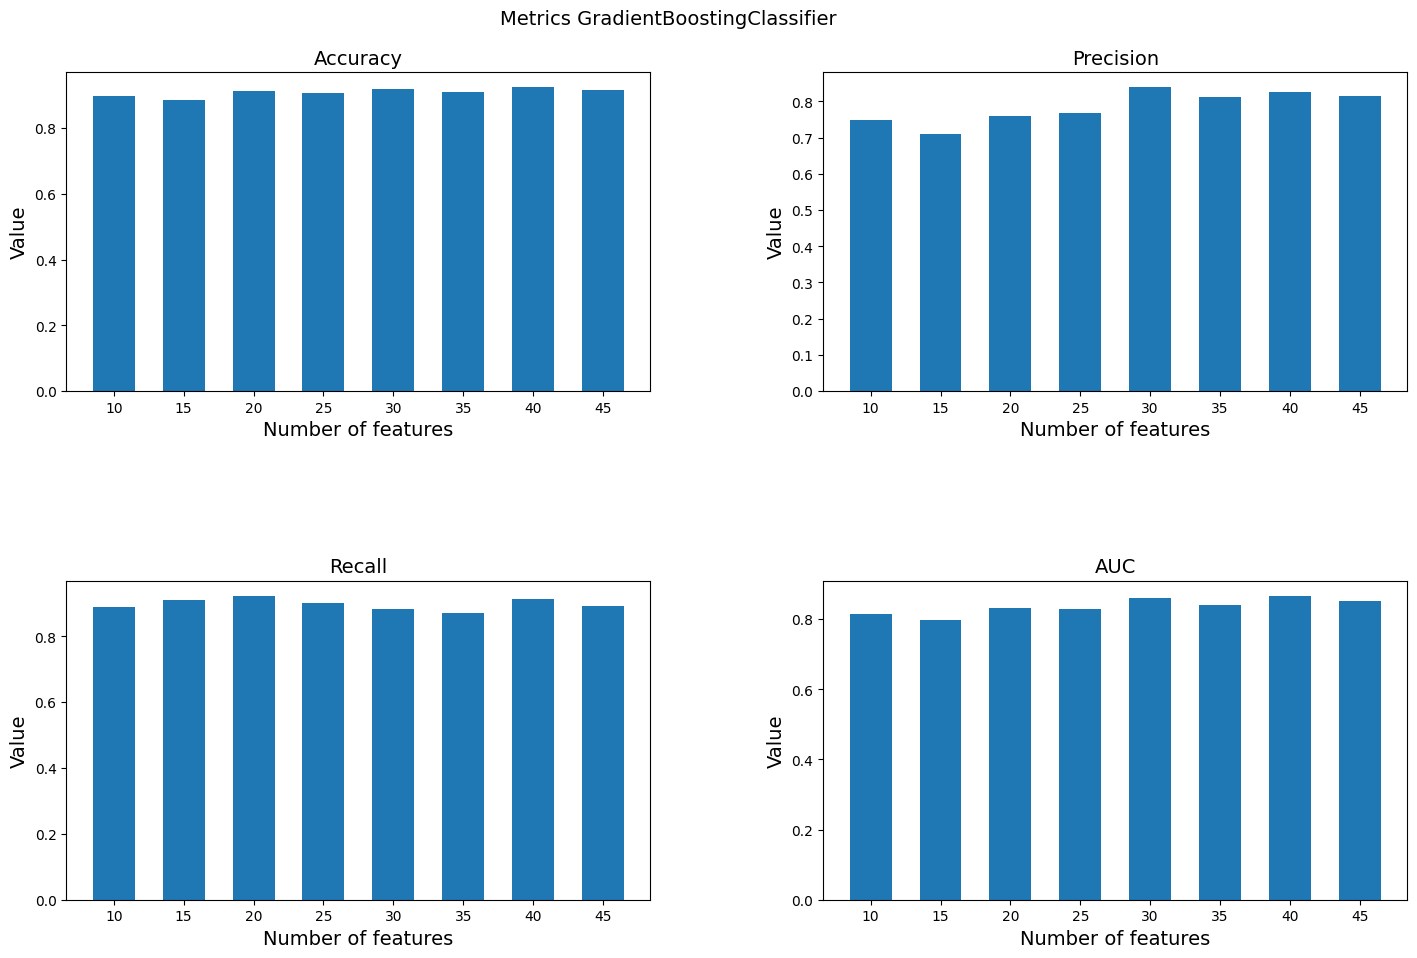

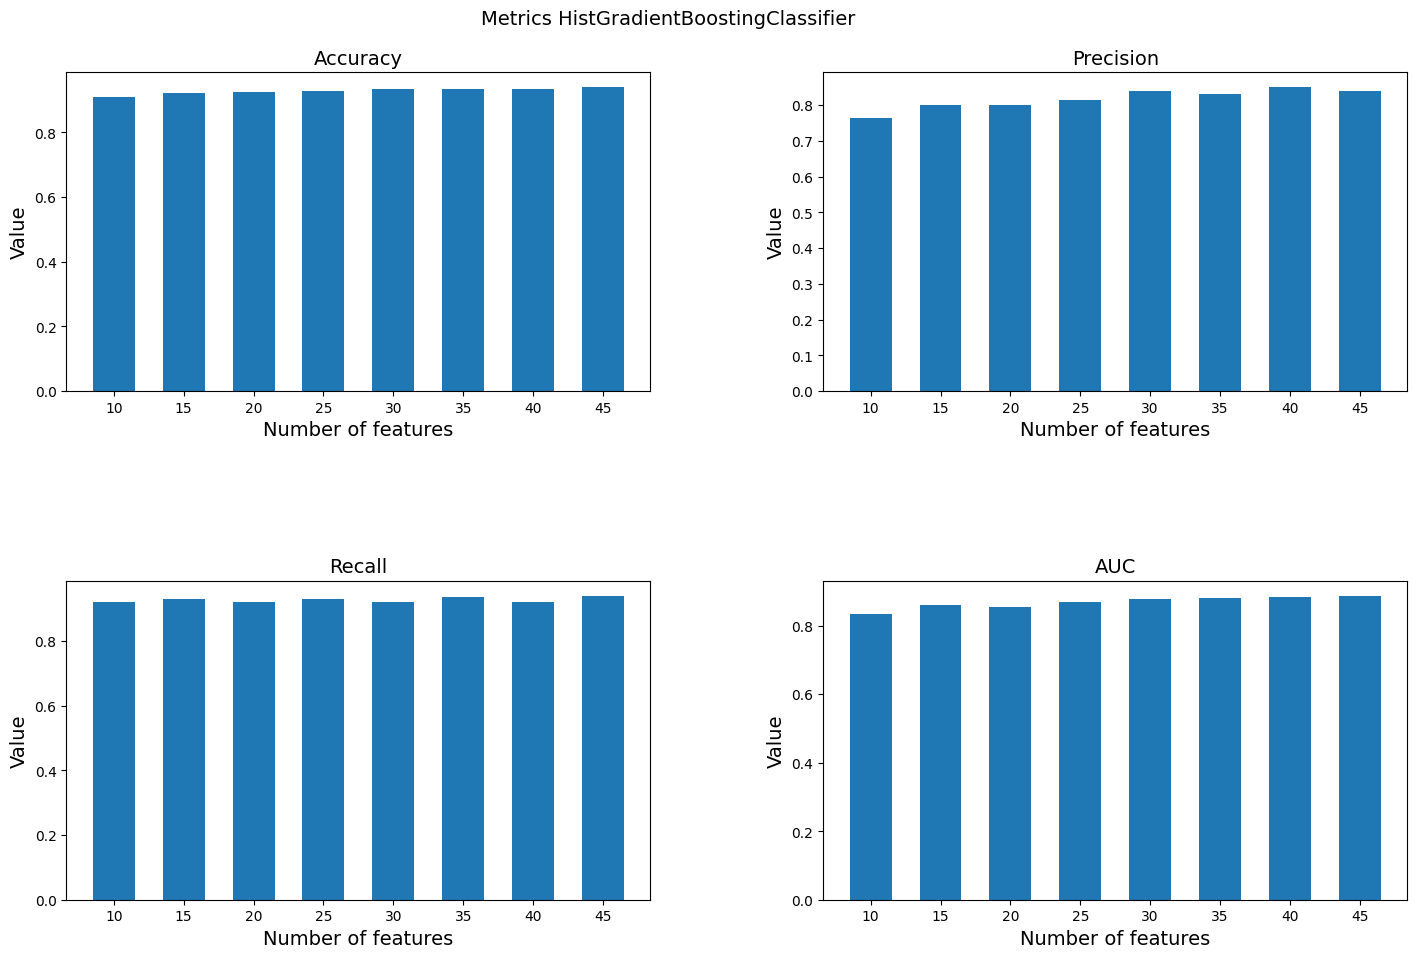

In [16]:
results_by_clf = {}
for clf in clfs:
    results_by_clf[clf] = [result for result in results if result.clf == clf]

    
for clf, result_by_clf in results_by_clf.items():
    clf_name = clf.__class__.__name__

    # Строим график столбцов
    accuracy_values = [result.accuracy for result in result_by_clf]
    precision_values = [result.precision for result in result_by_clf]
    recall_values = [result.recall for result in result_by_clf]
    auc_values = [result.auc for result in result_by_clf]
    f1_values = [result.f1 for result in result_by_clf]

    # Добавляем заголовок и подписи осей
    fig, axs = plt.subplots(2, 2)

    # Первый график
    axs[0, 0].bar(features_numbers, accuracy_values, width=3)
    axs[0, 0].set_title('Accuracy', fontsize=14)
    axs[0, 0].set_xlabel('Number of features', fontsize=14)
    axs[0, 0].set_ylabel('Value', fontsize=14)

    # Второй график
    axs[0, 1].bar(features_numbers, precision_values, width=3)
    axs[0, 1].set_title('Precision', fontsize=14)
    axs[0, 1].set_xlabel('Number of features', fontsize=14)
    axs[0, 1].set_ylabel('Value', fontsize=14)

    # Третий график
    axs[1, 0].bar(features_numbers, recall_values, width=3)
    axs[1, 0].set_title('Recall', fontsize=14)
    axs[1, 0].set_xlabel('Number of features', fontsize=14)
    axs[1, 0].set_ylabel('Value', fontsize=14)

    # Четвертый график
    axs[1, 1].bar(features_numbers, f1_values, width=3)
    axs[1, 1].set_title('AUC', fontsize=14)
    axs[1, 1].set_xlabel('Number of features', fontsize=14)
    axs[1, 1].set_ylabel('Value', fontsize=14)

    # Настраиваем расположение графиков и добавляем общий заголовок
    fig.tight_layout()
    fig.suptitle(f'Metrics {clf_name}', fontsize=14)

    # Сохраняем график
    fig.set_size_inches(15.5, 10.5, forward=True)
    fig.savefig(f'metrics_clf/Metrics_{clf_name}.png', dpi=300)
    plt.show()

# Plot ROC curves

<Figure size 800x800 with 0 Axes>

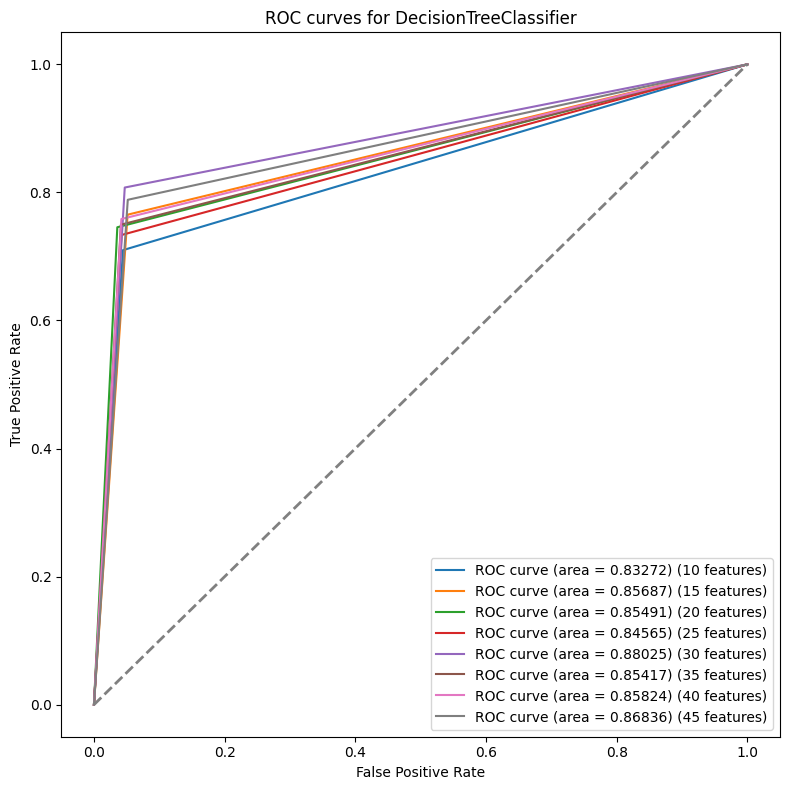

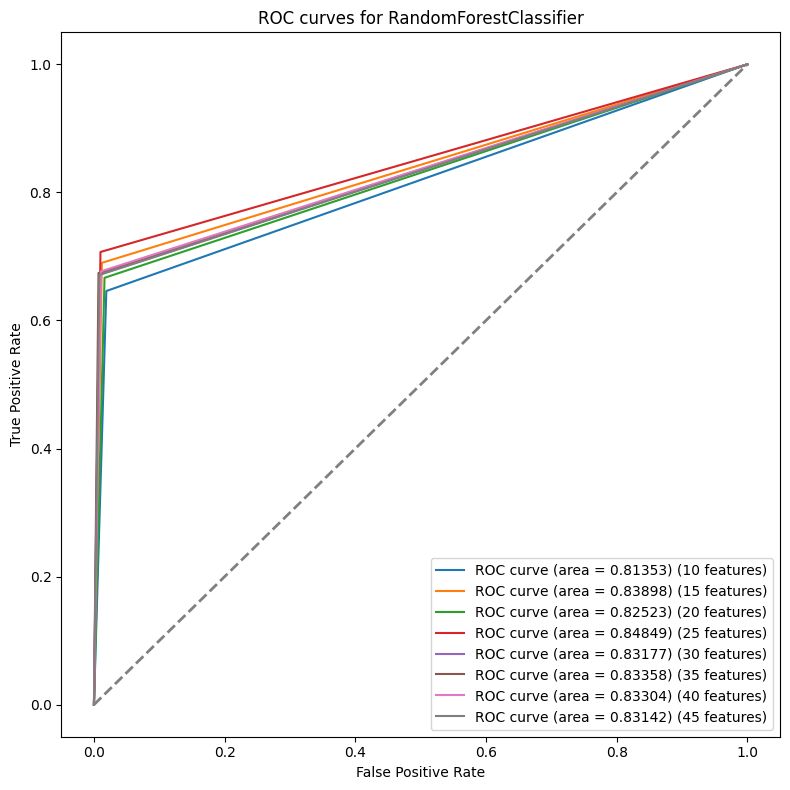

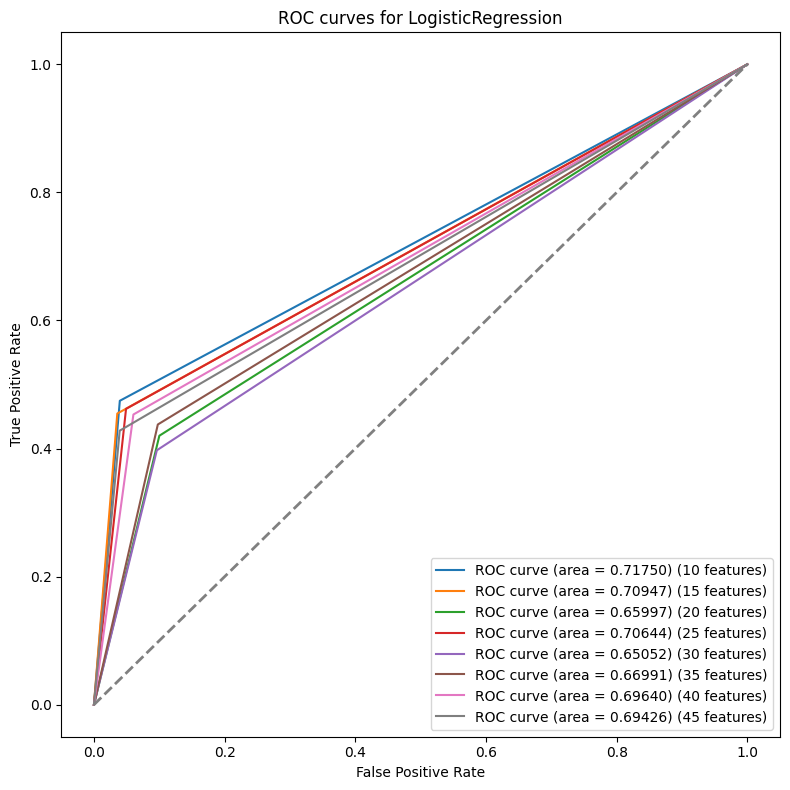

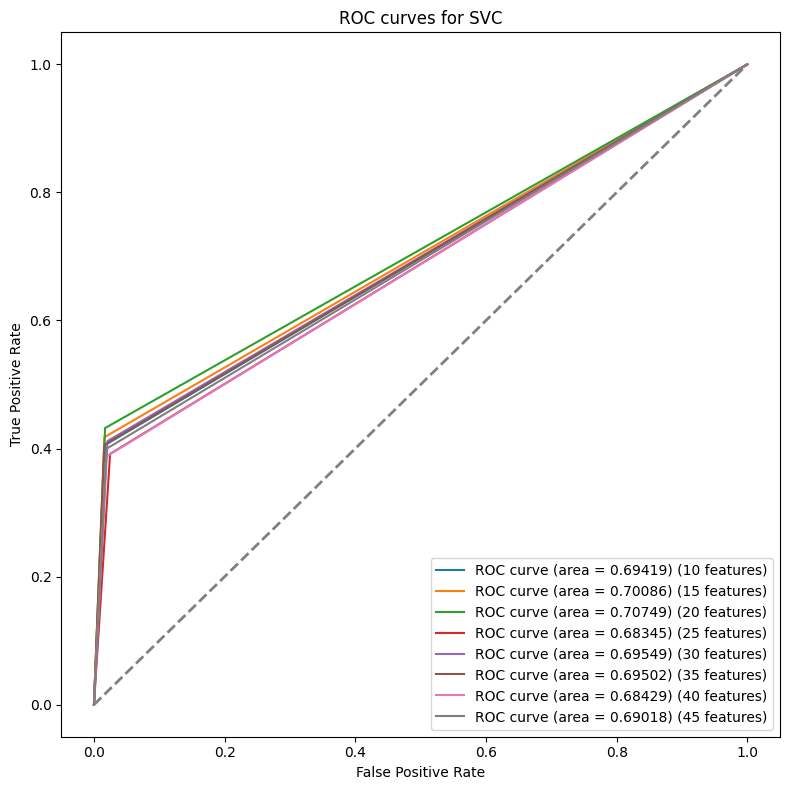

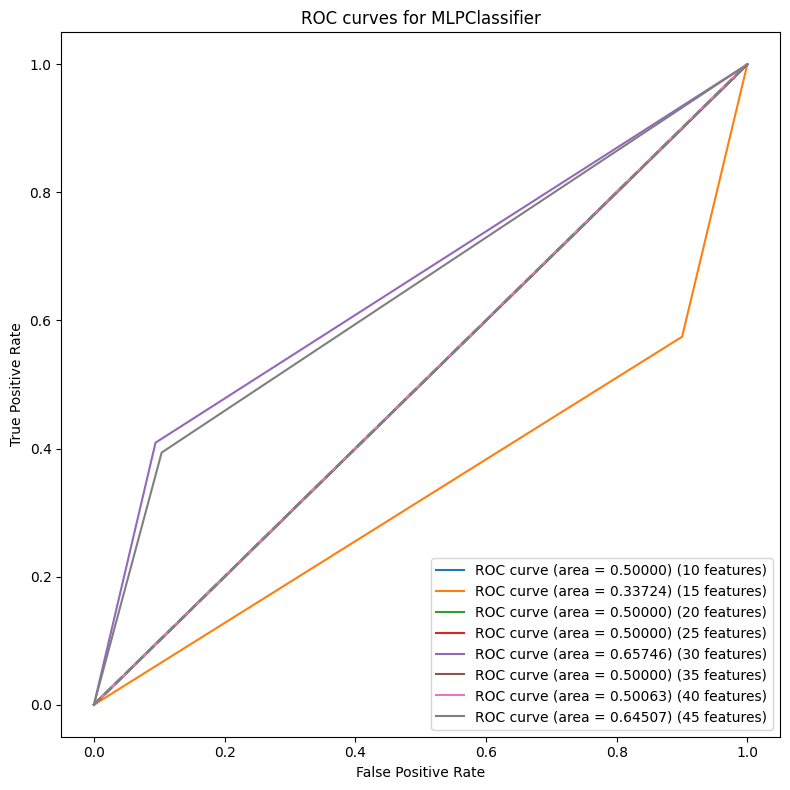

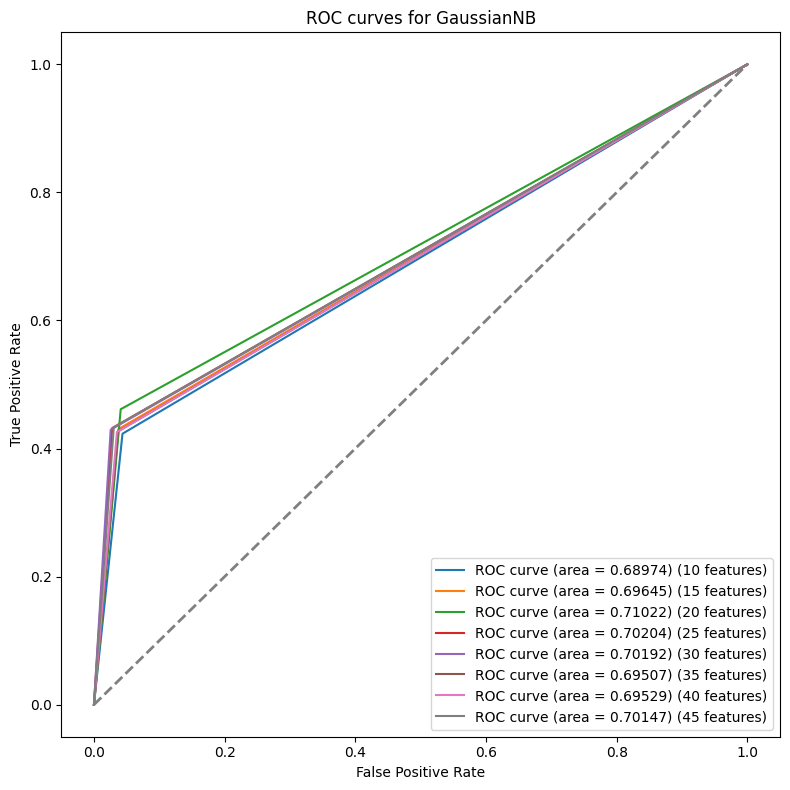

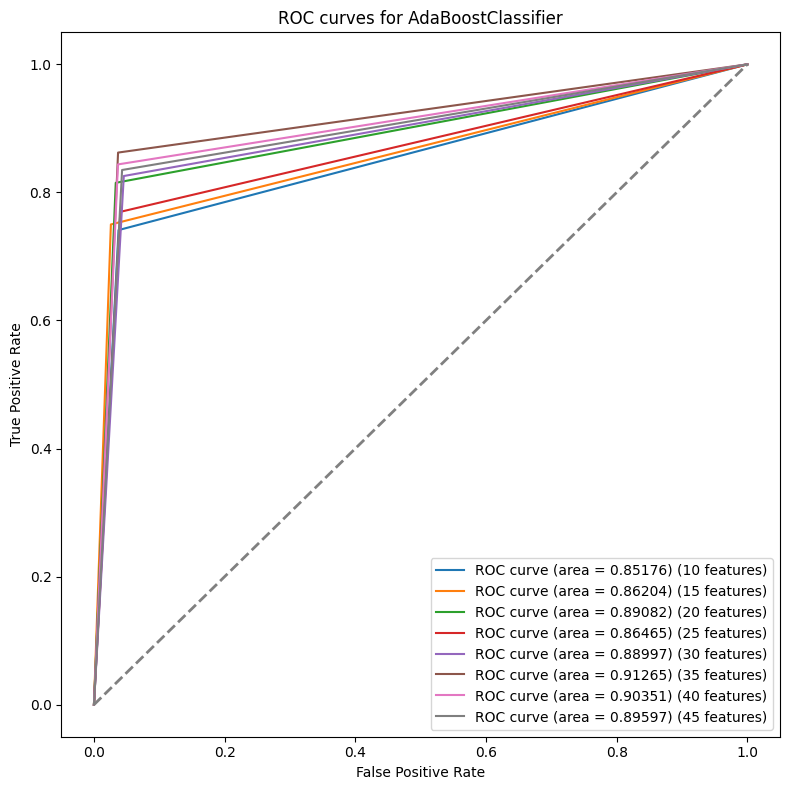

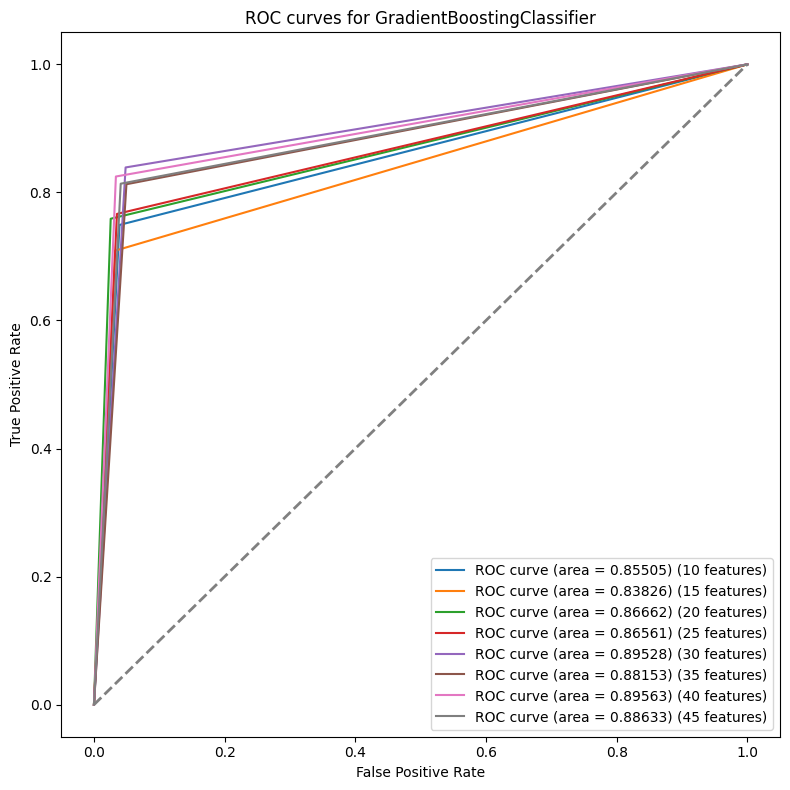

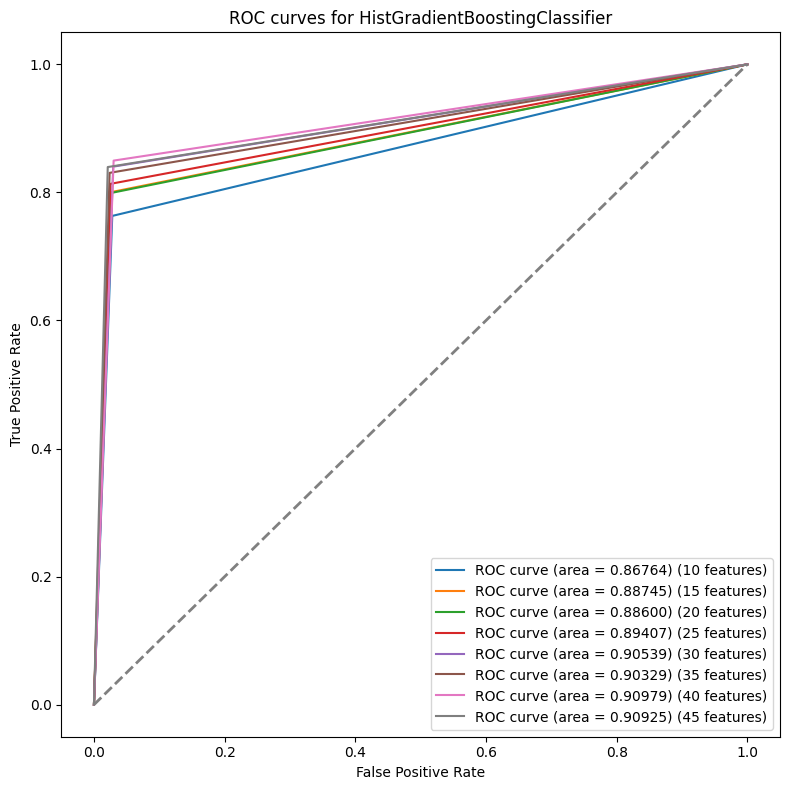

In [17]:
fig = plt.figure(figsize=(8, 8))

# Строим ROC кривые
for clf, result_by_clf in results_by_clf.items():
    fig = plt.figure(figsize=(8, 8))
    clf_name = clf.__class__.__name__
    for i in range(len(result_by_clf)):
        plt.plot(
            result_by_clf[i].fpr,
            result_by_clf[i].tpr,
            label=f'ROC curve (area = %0.5f) ({result_by_clf[i].selected_features_len} features)'% result_by_clf[i].auc
        )

    plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC curves for {clf_name}')
    plt.legend(loc="lower right")

    # Сохраняем график
    fig.tight_layout()
    plt.savefig(f'ROC_clf/ROC-curves_{clf_name}.png', dpi=300)
    plt.show()